In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression, Lasso , Ridge ,LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score,confusion_matrix,recall_score,precision_score
from sklearn.metrics import f1_score,classification_report,roc_curve,roc_auc_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,OneHotEncoder , LabelEncoder,MinMaxScaler
from sklearn import linear_model
import math
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from imblearn.under_sampling import RandomUnderSampler
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn.tree import DecisionTreeRegressor , plot_tree, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier , RandomForestRegressor
from sklearn.datasets import load_iris
from lazypredict.Supervised import LazyClassifier
from sklearn.linear_model import SGDClassifier
import warnings
import module as md
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.model_selection import RandomizedSearchCV
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


### EDA

In [3]:
df.shape 

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [6]:
df.duplicated().sum()

0

In [7]:
replace = df.columns.difference(['Outcome', 'Pregnancies'])
df[replace] = df[replace].replace(0, np.nan)

In [8]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
for col in df.columns:
    if df[col].isna().sum()<len(df[col])*0.7:
        if df[col].dtype== "object":
            df[col].fillna(df[col].mode()[0],inplace=True)
        elif df[col].dtype=="float64" or df[col].dtype=="int64":
            df[col].fillna(df[col].mean(),inplace=True)    

In [10]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,121.69,72.41,29.15,155.55,32.46,0.47,33.24,0.35
std,3.37,30.44,12.10,8.79,85.02,6.88,0.33,11.76,0.48
min,0.00,44.00,24.00,7.00,14.00,18.20,0.08,21.00,0.00
25%,1.00,99.75,64.00,25.00,121.50,27.50,0.24,24.00,0.00
50%,3.00,117.00,72.20,29.15,155.55,32.40,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,155.55,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [12]:
md.data_info(df)

,Col_Name,Dtype,N_unique,Count,Missing,Unique
0,Pregnancies,int64,17,768,0,"[6, 1, 8, 0, 5, 3, 10, 2, 4, 7, 9, 11, 13, 15,..."
1,Glucose,float64,136,768,0,"[148.0, 85.0, 183.0, 89.0, 137.0, 116.0, 78.0,..."
2,BloodPressure,float64,47,768,0,"[72.0, 66.0, 64.0, 40.0, 74.0, 50.0, 72.405184..."
3,SkinThickness,float64,51,768,0,"[35.0, 29.0, 29.153419593345657, 23.0, 32.0, 4..."
4,Insulin,float64,186,768,0,"[155.5482233502538, 94.0, 168.0, 88.0, 543.0, ..."
5,BMI,float64,248,768,0,"[33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35...."
6,DiabetesPedigreeFunction,float64,517,768,0,"[0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.2..."
7,Age,int64,52,768,0,"[50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 5..."
8,Outcome,int64,2,768,0,"[1, 0]"


<Axes: >

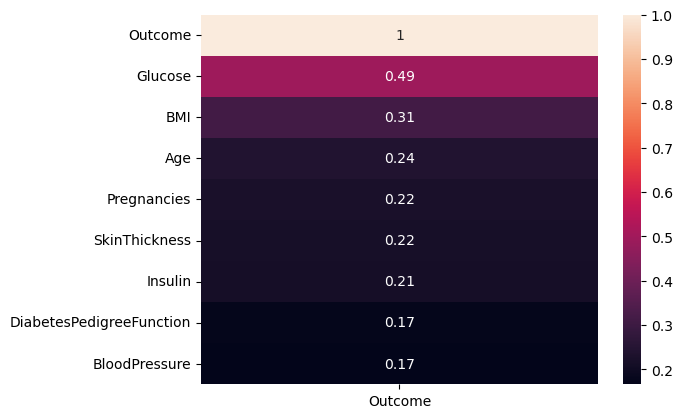

In [13]:
corr_with_PlacementStatus = df.corr().abs()[['Outcome']].sort_values(by='Outcome', ascending=False)
sns.heatmap(corr_with_PlacementStatus, annot=True)

<Axes: >

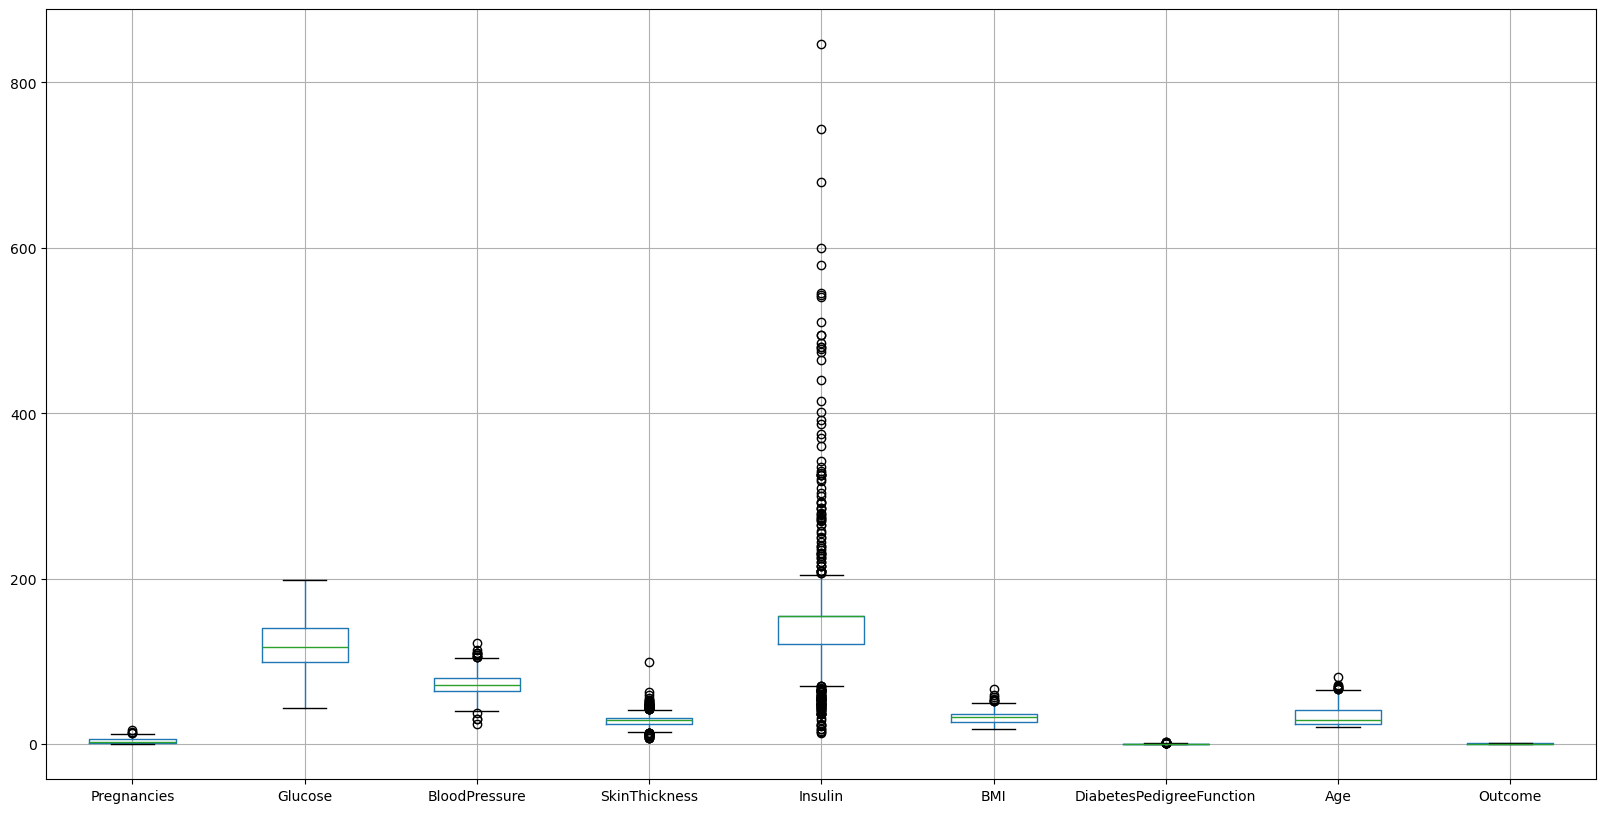

In [14]:
df.boxplot(figsize=(20,10))

In [15]:
x = df.drop(["Outcome"], axis=1)
y = df['Outcome']

In [16]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### MODELS

### not scaled 

In [17]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

x_train shape: (460, 8)
x_val shape: (154, 8)
x_test shape: (154, 8)
y_train shape: (460,)
y_val shape: (154,)
y_test shape: (154,)


In [18]:
clf = LazyClassifier(verbose = 0,ignore_warnings= True,random_state= 42,classifiers= "all")
models, predictions = clf.fit(x_train, x_val, y_train, y_val)
models

100%|██████████| 32/32 [00:00<00:00, 38.27it/s]

[LightGBM] [Info] Number of positive: 166, number of negative: 294
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.360870 -> initscore=-0.571592
[LightGBM] [Info] Start training from score -0.571592
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.79,0.77,0.77,0.79,0.11
BaggingClassifier,0.81,0.77,0.77,0.80,0.03
AdaBoostClassifier,0.78,0.77,0.77,0.78,0.09
GaussianNB,0.77,0.75,0.75,0.78,0.01
LogisticRegression,0.78,0.75,0.75,0.78,0.01
LinearDiscriminantAnalysis,0.77,0.74,0.74,0.77,0.01
SVC,0.77,0.74,0.74,0.77,0.01
RidgeClassifierCV,0.77,0.74,0.74,0.77,0.01
RidgeClassifier,0.77,0.74,0.74,0.77,0.01


In [19]:
rfc_clf = RandomForestClassifier(random_state=42)

rfc_clf.fit(x_train, y_train)

y_pred_train = rfc_clf.predict(x_train)

print('acc_train:',accuracy_score(y_train, y_pred_train))
print('f1_train:', f1_score(y_train, y_pred_train))
print('recall_score_train:', recall_score(y_train, y_pred_train))
print('precision_score_train:',precision_score(y_train, y_pred_train))
print('confusion_matrix_train:', confusion_matrix(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print ("*"*50)

y_pred_val = rfc_clf.predict(x_val)

print('acc_test:',accuracy_score(y_val, y_pred_val))
print('f1_test:', f1_score(y_val, y_pred_val))
print('recall_score_test:', recall_score(y_val, y_pred_val))
print('precision_score_test:', precision_score(y_val, y_pred_val))
print('confusion_matrix_test:', confusion_matrix(y_val, y_pred_val))
print('classification_report_test:\n', classification_report(y_val, y_pred_val))

acc_train: 1.0
f1_train: 1.0
recall_score_train: 1.0
precision_score_train: 1.0
confusion_matrix_train: [[294   0]
 [  0 166]]
classification_report_train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       294
           1       1.00      1.00      1.00       166

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460

**************************************************
acc_test: 0.7857142857142857
f1_test: 0.6915887850467289
recall_score_test: 0.74
precision_score_test: 0.6491228070175439
confusion_matrix_test: [[84 20]
 [13 37]]
classification_report_test:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       104
           1       0.65      0.74      0.69        50

    accuracy                           0.79       154
   macro avg       0.76      0.77      0.76       154


### scaled

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
X_val = scaler.transform(x_val)

In [21]:
clf_scaled = LazyClassifier(verbose = 0,ignore_warnings= True,random_state= 42,classifiers= "all")
models, predictions = clf.fit(x_train, x_val, y_train, y_val)
models

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 32/32 [00:00<00:00, 46.47it/s]

[LightGBM] [Info] Number of positive: 166, number of negative: 294
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 460, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.360870 -> initscore=-0.571592
[LightGBM] [Info] Start training from score -0.571592
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.79,0.77,0.77,0.79,0.12
BaggingClassifier,0.81,0.77,0.77,0.80,0.03
AdaBoostClassifier,0.78,0.77,0.77,0.78,0.07
GaussianNB,0.77,0.75,0.75,0.78,0.01
LogisticRegression,0.78,0.75,0.75,0.78,0.01
LinearDiscriminantAnalysis,0.77,0.74,0.74,0.77,0.01
SVC,0.77,0.74,0.74,0.77,0.01
RidgeClassifierCV,0.77,0.74,0.74,0.77,0.01
RidgeClassifier,0.77,0.74,0.74,0.77,0.01


In [22]:
rfc_clf_scaled = RandomForestClassifier(random_state=42)

rfc_clf_scaled.fit(x_train, y_train)

y_pred_train = rfc_clf_scaled.predict(x_train)

print('acc_train:',accuracy_score(y_train, y_pred_train))
print('f1_train:', f1_score(y_train, y_pred_train))
print('recall_score_train:', recall_score(y_train, y_pred_train))
print('precision_score_train:',precision_score(y_train, y_pred_train))
print('confusion_matrix_train:', confusion_matrix(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print ("*"*50)

y_pred_val = rfc_clf_scaled.predict(x_val)

print('acc_test:',accuracy_score(y_val, y_pred_val))
print('f1_test:', f1_score(y_val, y_pred_val))
print('recall_score_test:', recall_score(y_val, y_pred_val))
print('precision_score_test:', precision_score(y_val, y_pred_val))
print('confusion_matrix_test:', confusion_matrix(y_val, y_pred_val))
print('classification_report_test:\n', classification_report(y_val, y_pred_val))

acc_train: 1.0
f1_train: 1.0
recall_score_train: 1.0
precision_score_train: 1.0
confusion_matrix_train: [[294   0]
 [  0 166]]
classification_report_train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       294
           1       1.00      1.00      1.00       166

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460

**************************************************
acc_test: 0.7857142857142857
f1_test: 0.6915887850467289
recall_score_test: 0.74
precision_score_test: 0.6491228070175439
confusion_matrix_test: [[84 20]
 [13 37]]
classification_report_test:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       104
           1       0.65      0.74      0.69        50

    accuracy                           0.79       154
   macro avg       0.76      0.77      0.76       154


### BEST MODEL

### Oversampling scaled

In [23]:
sm = SMOTE(random_state=42)
X_over,y_over = sm.fit_resample(x,y)

In [24]:
x_train, x_temp, y_train, y_temp = train_test_split(X_over,y_over , test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

x_train shape: (600, 8)
x_val shape: (200, 8)
x_test shape: (200, 8)
y_train shape: (600,)
y_val shape: (200,)
y_test shape: (200,)


In [25]:
clf_Oversampling_scaled = LazyClassifier(verbose = 0,ignore_warnings= True,random_state= 42,classifiers= "all")
models, predictions = clf.fit(x_train, x_val, y_train, y_val)
models

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 32/32 [00:00<00:00, 43.14it/s]

[LightGBM] [Info] Number of positive: 303, number of negative: 297
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 813
[LightGBM] [Info] Number of data points in the train set: 600, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505000 -> initscore=0.020001
[LightGBM] [Info] Start training from score 0.020001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.84,0.84,0.84,0.84,0.13
LGBMClassifier,0.82,0.82,0.82,0.82,0.05
ExtraTreesClassifier,0.81,0.81,0.81,0.81,0.11
SVC,0.81,0.81,0.81,0.81,0.02
NuSVC,0.81,0.81,0.81,0.81,0.02
BaggingClassifier,0.81,0.80,0.80,0.80,0.04
LabelSpreading,0.80,0.79,0.79,0.79,0.02
LabelPropagation,0.80,0.79,0.79,0.79,0.02
KNeighborsClassifier,0.80,0.79,0.79,0.79,0.02


In [26]:
rfc_clf_scaled = RandomForestClassifier(
    random_state=42,
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=5,
    n_estimators=400,
)

rfc_clf_scaled.fit(x_train, y_train)

y_pred_train = rfc_clf_scaled.predict(x_train)

print('acc_train:', accuracy_score(y_train, y_pred_train))
print('f1_train:', f1_score(y_train, y_pred_train))
print('recall_score_train:', recall_score(y_train, y_pred_train))
print('precision_score_train:', precision_score(y_train, y_pred_train))
print('confusion_matrix_train:', confusion_matrix(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print("*" * 50)

y_pred_val = rfc_clf_scaled.predict(x_val)

print('acc_test:', accuracy_score(y_val, y_pred_val))
print('f1_test:', f1_score(y_val, y_pred_val))
print('recall_score_test:', recall_score(y_val, y_pred_val))
print('precision_score_test:', precision_score(y_val, y_pred_val))
print('confusion_matrix_test:', confusion_matrix(y_val, y_pred_val))
print('classification_report_test:\n', classification_report(y_val, y_pred_val))


acc_train: 0.8733333333333333
f1_train: 0.879746835443038
recall_score_train: 0.9174917491749175
precision_score_train: 0.8449848024316109
confusion_matrix_train: [[246  51]
 [ 25 278]]
classification_report_train:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87       297
           1       0.84      0.92      0.88       303

    accuracy                           0.87       600
   macro avg       0.88      0.87      0.87       600
weighted avg       0.88      0.87      0.87       600

**************************************************
acc_test: 0.81
f1_test: 0.8272727272727273
recall_score_test: 0.875
precision_score_test: 0.7844827586206896
confusion_matrix_test: [[71 25]
 [13 91]]
classification_report_test:
               precision    recall  f1-score   support

           0       0.85      0.74      0.79        96
           1       0.78      0.88      0.83       104

    accuracy                           0.81       200
   macro

In [27]:
y_pred_tast = rfc_clf_scaled.predict(x_test)
print('acc_test:',accuracy_score(y_test, y_pred_tast))
print('f1_test:', (f1_score(y_test, y_pred_tast)))
print('recall_score_test:', (recall_score(y_test, y_pred_tast)))
print('precision_score_test:', (precision_score(y_test, y_pred_tast)))
print('confusion_matrix_test:', confusion_matrix(y_test, y_pred_tast))
print('classification_report_test:\n', classification_report(y_test, y_pred_tast))

acc_test: 0.75
f1_test: 0.7474747474747475
recall_score_test: 0.7956989247311828
precision_score_test: 0.7047619047619048
confusion_matrix_test: [[76 31]
 [19 74]]
classification_report_test:
               precision    recall  f1-score   support

           0       0.80      0.71      0.75       107
           1       0.70      0.80      0.75        93

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.76      0.75      0.75       200



### undersampling scaled

In [28]:
rus = RandomUnderSampler(random_state=42)
X_under,y_under = rus.fit_resample(x,y)

In [29]:
x_train, x_temp, y_train, y_temp = train_test_split(X_under,y_under , test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print("x_train shape:", x_train.shape)
print("x_val shape:", x_val.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

x_train shape: (321, 8)
x_val shape: (107, 8)
x_test shape: (108, 8)
y_train shape: (321,)
y_val shape: (107,)
y_test shape: (108,)


In [30]:
clf_undersampling_scaled = LazyClassifier(verbose = 1,ignore_warnings= True,random_state= 42,classifiers= "all")
models, predictions = clf.fit(x_train, x_val, y_train, y_val)
models

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 32/32 [00:00<00:00, 54.41it/s]

[LightGBM] [Info] Number of positive: 164, number of negative: 157
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 321, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.510903 -> initscore=0.043621
[LightGBM] [Info] Start training from score 0.043621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.77,0.77,0.77,0.77,0.01
KNeighborsClassifier,0.76,0.77,0.77,0.76,0.01
CalibratedClassifierCV,0.77,0.76,0.76,0.77,0.02
NuSVC,0.77,0.76,0.76,0.77,0.01
AdaBoostClassifier,0.76,0.76,0.76,0.76,0.07
ExtraTreesClassifier,0.76,0.76,0.76,0.76,0.08
RandomForestClassifier,0.76,0.76,0.76,0.76,0.10
PassiveAggressiveClassifier,0.76,0.76,0.76,0.76,0.01
Perceptron,0.77,0.76,0.76,0.77,0.01


In [31]:
sgd_clf = DecisionTreeClassifier( random_state=42)

sgd_clf.fit(x_train, y_train)

y_pred_train = sgd_clf.predict(x_train)

print('acc_train:',accuracy_score(y_train, y_pred_train))
print('f1_train:', f1_score(y_train, y_pred_train))
print('recall_score_train:', recall_score(y_train, y_pred_train))
print('precision_score_train:',precision_score(y_train, y_pred_train))
print('confusion_matrix_train:', confusion_matrix(y_train, y_pred_train))
print('classification_report_train:\n', classification_report(y_train, y_pred_train))

print ("*"*50)

y_pred_val = sgd_clf.predict(x_val)

print('acc_test:',accuracy_score(y_val, y_pred_val))
print('f1_test:', f1_score(y_val, y_pred_val))
print('recall_score_test:', recall_score(y_val, y_pred_val))
print('precision_score_test:', precision_score(y_val, y_pred_val))
print('confusion_matrix_test:', confusion_matrix(y_val, y_pred_val))
print('classification_report_test:\n', classification_report(y_val, y_pred_val))

acc_train: 1.0
f1_train: 1.0
recall_score_train: 1.0
precision_score_train: 1.0
confusion_matrix_train: [[157   0]
 [  0 164]]
classification_report_train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       164

    accuracy                           1.00       321
   macro avg       1.00      1.00      1.00       321
weighted avg       1.00      1.00      1.00       321

**************************************************
acc_test: 0.6635514018691588
f1_test: 0.5909090909090909
recall_score_test: 0.5777777777777777
precision_score_test: 0.6046511627906976
confusion_matrix_test: [[45 17]
 [19 26]]
classification_report_test:
               precision    recall  f1-score   support

           0       0.70      0.73      0.71        62
           1       0.60      0.58      0.59        45

    accuracy                           0.66       107
   macro avg       0.65      0.65      0

In [32]:
import pickle
with open("diabetes.pkl", "wb") as file:
    pickle.dump(rfc_clf_scaled,file)